In [57]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [11]:
#cargamos los datos de entrada
data = pd.read_csv("data/Estudiantes.csv")
data.shape


(1000, 7)

In [12]:
#Son 1000 registros 7 columnas
data.head()

,Genero,Etnia,Nivel educativo de los padres,Examen de preparacion,Matematicas,Lectura,Escritura
0,Femenino,Grupo B,"Licenciatura, Ingenieria",No realizado,72,72,74
1,Femenino,Grupo C,"Educacion Superior, no titulado",Completado,69,90,88
2,Femenino,Grupo B,Maestria,No realizado,90,95,93
3,Masculino,Grupo A,Preparatoria,No realizado,47,57,44
4,Masculino,Grupo C,"Educacion Superior, no titulado",No realizado,76,78,75


In [13]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,Matematicas,Lectura,Escritura
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


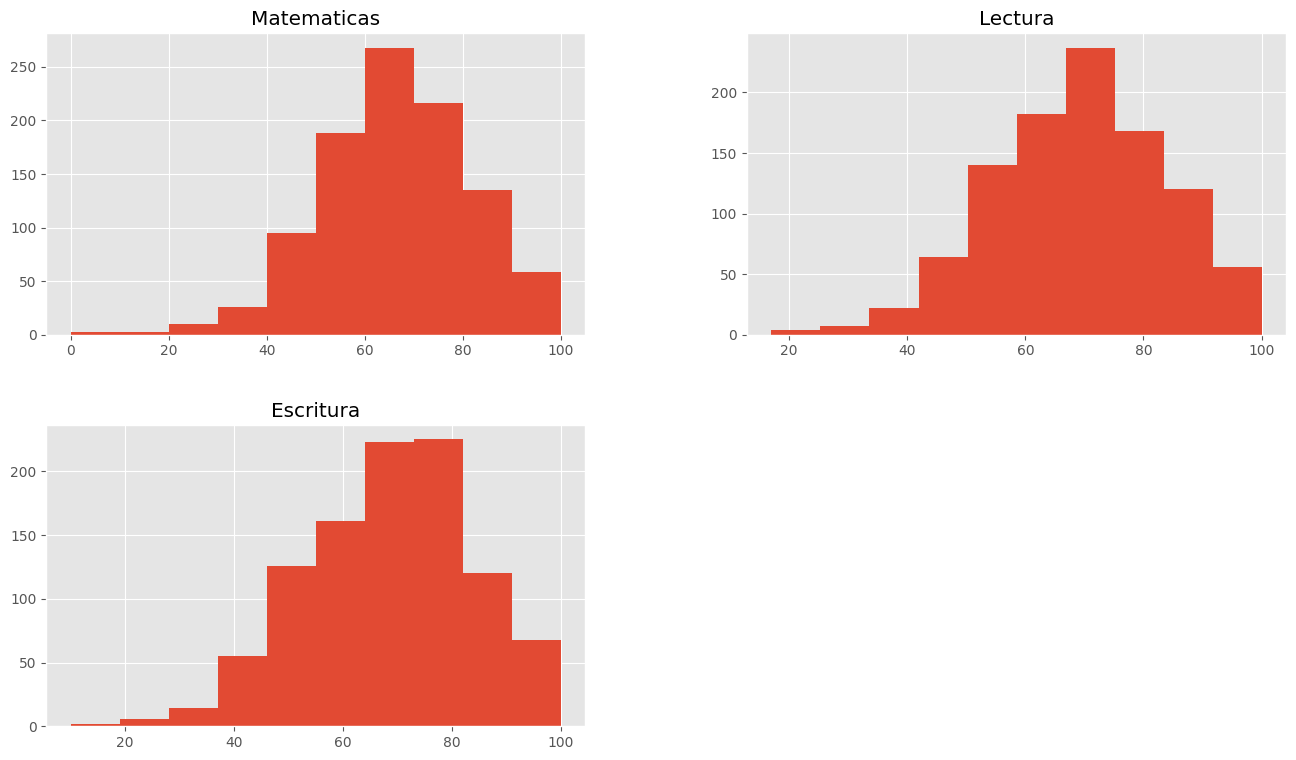

In [14]:
data.drop(columns=['Genero','Etnia']).hist()
plt.show()

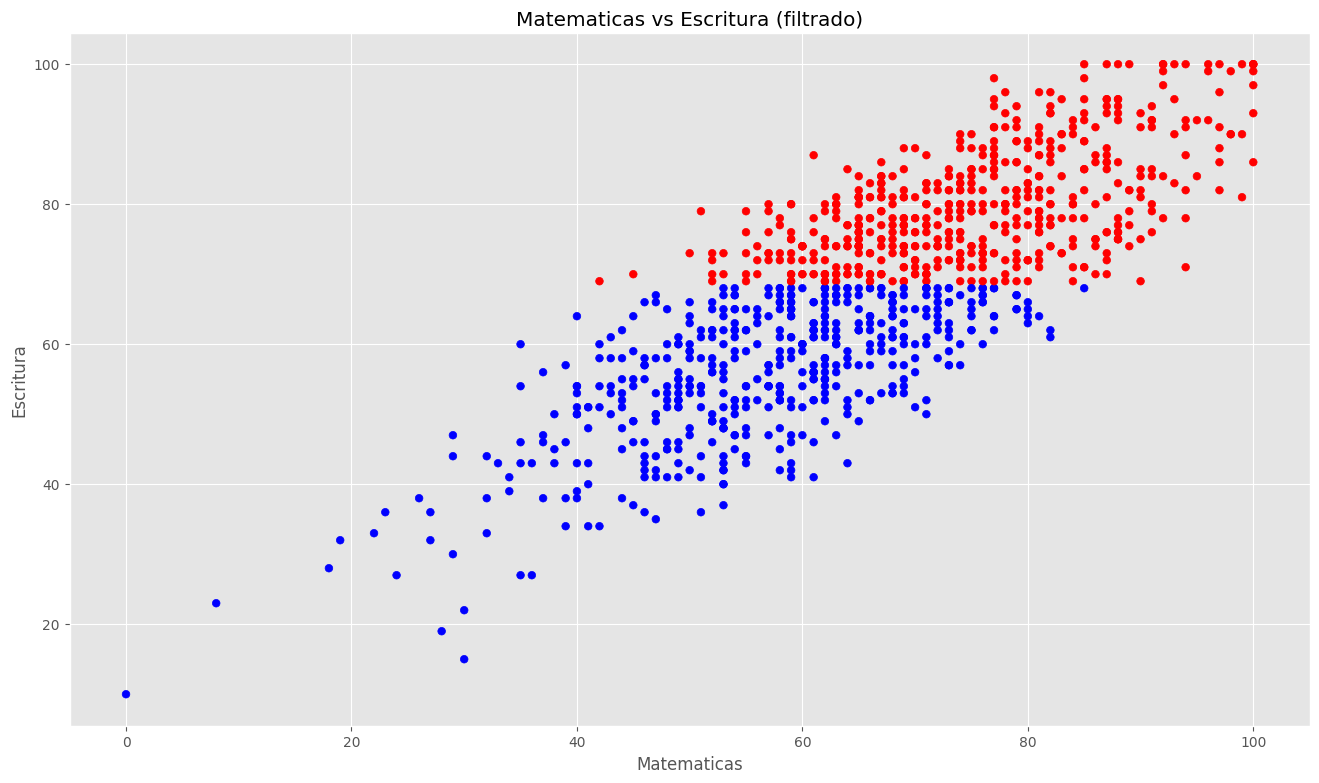

In [15]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# # y en el eje Y: entre 0 y 80.000
# Filtrar los datos según los valores de Lectura y Escritura
filtered_data = data[(data['Matematicas'] <= 100) & (data['Escritura'] <= 100)]

# Definir colores y tamaño
colores = ['red', 'blue']
tamanios = [30, 60]

# Extraer los valores para los ejes
f1 = filtered_data['Matematicas'].values
f2 = filtered_data['Escritura'].values

# Asignar colores según el conteo de palabras
asignar = []
for index, row in filtered_data.iterrows():
    if row['Escritura'] > filtered_data['Escritura'].mean():
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

# Graficar
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.xlabel('Matematicas')
plt.ylabel('Escritura')
plt.title('Matematicas vs Escritura (filtrado)')
plt.show()

In [61]:
dataX =filtered_data[["Matematicas"]]
X_train = np.array(dataX)
y_train = filtered_data['Escritura'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
# Calcular métricas de evaluación
mae = mean_absolute_error(y_train, y_pred)
y_range = y_train.max() - y_train.min()
mae_normalizado = mae / y_range
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print("Mean absolute error: %.2f" % mae)
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))
print('Mean absolute error normalizado: %.2f' % mae_normalizado)

Coefficients: 
 [0.80436647]
Independent term: 
 14.894224270018505
Mean squared error: 82.07
Mean absolute error: 7.54
Variance score: 0.64
Mean absolute error normalizado: 0.08


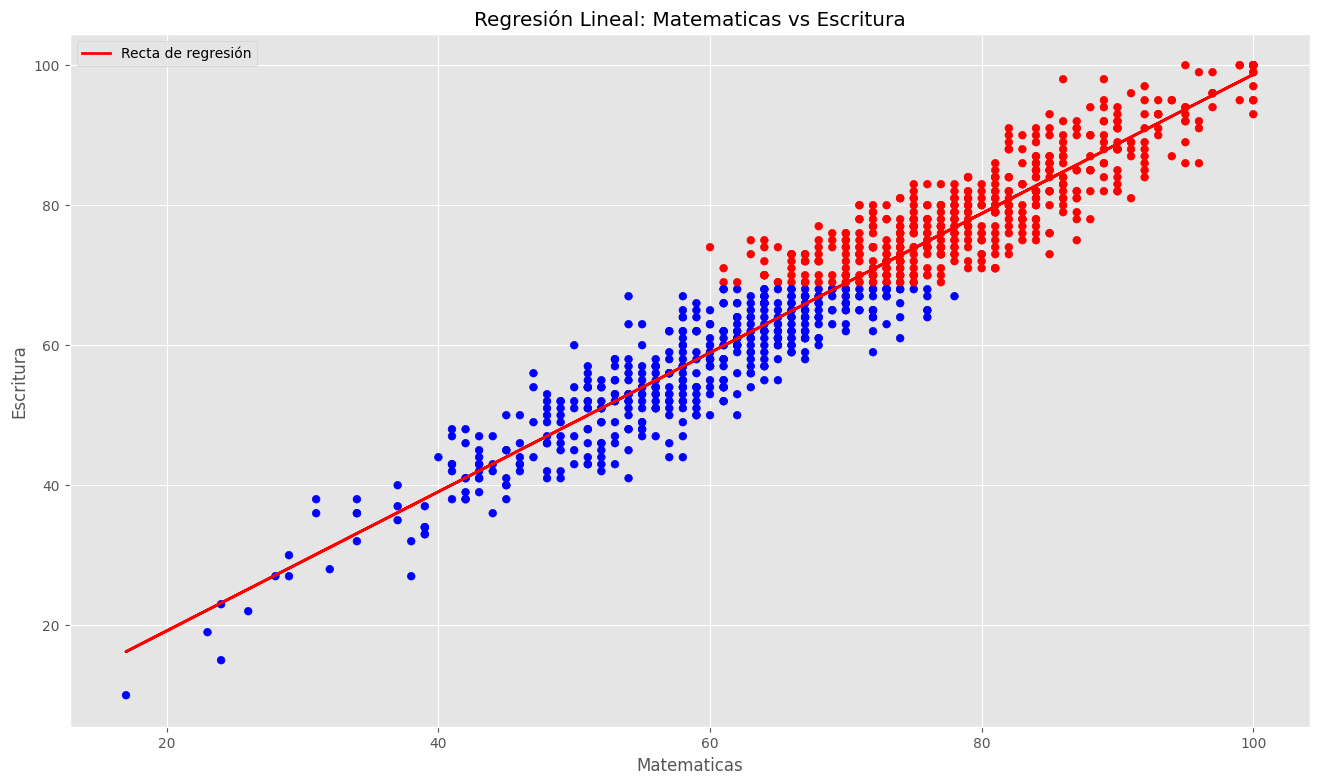

In [45]:
# Presentación gráfica de los resultados
plt.scatter(X_train, y_train,c=asignar, s=tamanios[0])
plt.plot(X_train, y_pred, color='red', linewidth=2, label='Recta de regresión')

plt.title('Regresión Lineal: Matematicas vs Escritura')
plt.xlabel('Matematicas')
plt.ylabel('Escritura')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
#Interpretacion del error
#Las predicciones del modelo se desvían en promedio ±4.52 puntos del valor real
#En una escala de 0-100, esto es solo un 4.52% de error
#Para un modelo educativo, esto es muy preciso
#Si un estudiante tiene 80 puntos en Lectura:
#Tu modelo predecirá: 80 × 0.99 - 0.67 ≈ 78.7 en Escritura
#El rango de confianza (±1 desviación): 74.2 a 83.2 puntos
#Probabilidad alta de acertar dentro de ±5 puntos



In [19]:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

1986


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10760\452605552.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(y_Dosmil))


In [48]:
#Regresión Lineal Múltiple
# Usamos Matemáticas y Lectura para predecir Escritura
dataX = filtered_data[["Matematicas", "Lectura"]]
X_train = np.array(dataX)
y_train = filtered_data['Escritura'].values

# CREAR Y ENTRENAR EL MODELO
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# HACER PREDICCIONES
y_pred = regr.predict(X_train)

#  EVALUAR EL MODELO
print('Coeficientes: \n', regr.coef_)
print('Término independiente: \n', regr.intercept_)
print("Error Cuadrático Medio: %.2f" % mean_squared_error(y_train, y_pred))
print('R² Score: %.2f' % r2_score(y_train, y_pred))

# Interpretación de coeficientes
print("\nInterpretación:")
print(f"Por cada punto en Matemáticas, Escritura cambia en: {regr.coef_[0]:.4f}")
print(f"Por cada punto en Lectura, Escritura cambia en: {regr.coef_[1]:.4f}")

Coeficientes: 
 [0.06704516 0.93660305]
Término independiente: 
 -1.1608443222254152
Error Cuadrático Medio: 20.13
R² Score: 0.91

Interpretación:
Por cada punto en Matemáticas, Escritura cambia en: 0.0670
Por cada punto en Lectura, Escritura cambia en: 0.9366


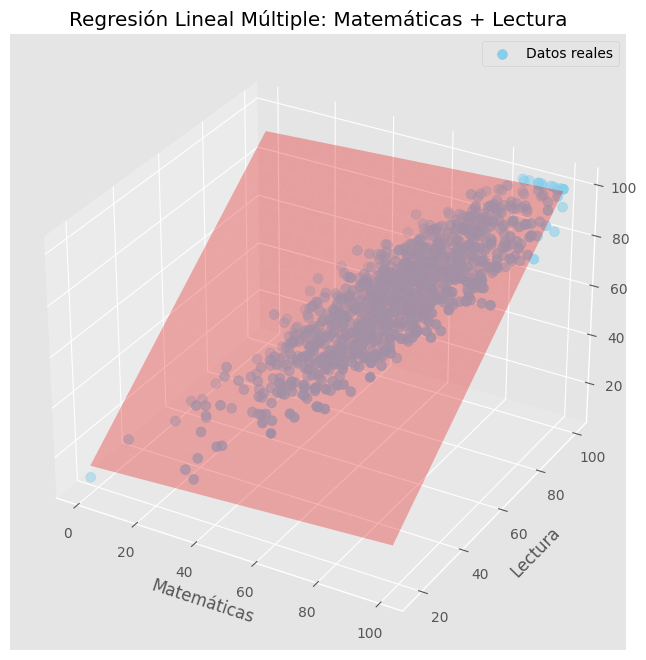

In [49]:
# GRÁFICO 3D para visualizar la regresión múltiple
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Datos reales
ax.scatter(filtered_data['Matematicas'], 
           filtered_data['Lectura'], 
           filtered_data['Escritura'],
           c='skyblue', marker='o', s=50, label='Datos reales')

# Crear malla para el plano de regresión
x_surf = np.linspace(filtered_data['Matematicas'].min(), 
                     filtered_data['Matematicas'].max(), 20)
y_surf = np.linspace(filtered_data['Lectura'].min(), 
                     filtered_data['Lectura'].max(), 20)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

# Calcular predicciones para el plano
z_surf = regr.intercept_ + regr.coef_[0] * x_surf + regr.coef_[1] * y_surf

# Graficar el plano de regresión
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.3, color='red')

ax.set_xlabel('Matemáticas')
ax.set_ylabel('Lectura')

ax.set_title('Regresión Lineal Múltiple: Matemáticas + Lectura')
ax.legend()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (1000, 2) and arg 1 with shape (1000,).

<Figure size 1600x900 with 0 Axes>